In [31]:
import urllib.request
import re
from konlpy.tag import Okt
from tqdm import tqdm
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
print(os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings(action='ignore')

from tkinter import *
from tkinter.ttk import *
import tkinter.font as font
from tkinter import filedialog
import os
from PIL import ImageTk, Image
import tensorflow as tf
import cv2
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
import glob
from glob import glob
from keras.models import load_model
from tensorflow.keras.preprocessing.text import text_to_word_sequence

C:\Users\hi\Anaconda3\jupiter\day22_mongoDB_chatbot\chatbot_Project(4category)\cloud_data\train\train_all2 - 복사본


In [32]:
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'

In [33]:
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [35]:
data_dir = os.chdir(os.getcwd() + "C:/Users/hi/Anaconda3/jupiter/day22_mongoDB_chatbot/chatbot_Project(4category)/cloud_data/train/train_all2")

OSError: [WinError 123] 파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못되었습니다: 'C:\\Users\\hi\\Anaconda3\\jupiter\\day22_mongoDB_chatbot\\chatbot_Project(4category)\\cloud_data\\train\\train_all2 - 복사본C:/Users/hi/Anaconda3/jupiter/day22_mongoDB_chatbot/chatbot_Project(4category)/cloud_data/train/train_all2'

In [23]:
print(os.getcwd())

C:\Users\hi\Anaconda3\jupiter\day22_mongoDB_chatbot\chatbot_Project(4category)\cloud_data\train\train_all2 - 복사본


In [24]:
data_list = glob('*.jpg')
print('파일의 목록 개수 >> ', len(data_list))
print('파일의 목록 타입 >> ', type(data_list))

파일의 목록 개수 >>  4202
파일의 목록 타입 >>  <class 'list'>


In [25]:
token = text_to_word_sequence(data_list[0])
token, type(token)

(['ac', '0', '1', '복사본', 'jpg'], list)

In [26]:
label2 = []

In [27]:
for x in data_list[:4202]:
    token = text_to_word_sequence(x)
    label2.append(token[0])
len(label2)

4202

In [28]:
# 라벨 인코딩(카테고리형 문자를 숫자로 자동 변환해주는 역할)
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

TypeError: Image data of dtype object cannot be converted to float

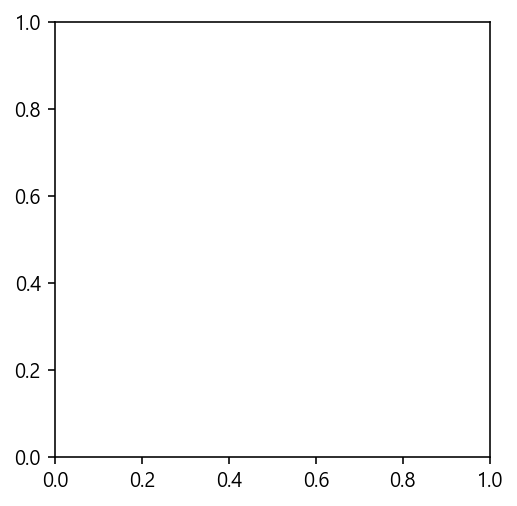

In [30]:
img0 = cv2.imread(data_list[0])
plt.imshow(img0)

In [ ]:
data_height = 150
data_width = 150
channel_n = 3#칼라로 맞추기(흑백이면 1)칼라는 rgb3개를 고려해야하기 때문에 3이다.

In [14]:
## 이미지 표준화(0~1사이로)
## 픽셀은 0~255의 크기를 가지므로 255로 나누어서 
## 표준화를 진행해주자.(0~1사이로표시)
## 2323개의 크기를 다 변경해주세요
img_list = []#크기를 변경하고 나서의 결과를 모아주기 위한 리스트
# 2323개의 이미지 전처리(스케일링)
for x in data_list:
    #픽셀크기가(0~255)이므로 255로 나누자
    scaled_one = cv2.imread(x) / 255
    resized_one = cv2.resize(scaled_one, (data_height, data_width))
#     print('변경 전', scaled_one.shape)
#     print('변경 후', resized_one.shape)    
    img_list.append(resized_one)
len(img_list),img_list[0].shape

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [15]:
##data_list : 전체 이미지 목록의 리스트
##읽어온 이미지 목록을 넣으면 라벨링/이미지 스케일링/리사이징해서
##우리가 원하는 이미지 데이터를 만들자.
def make_file(data_height, data_width, channel_n, data_list_n):#len(data_list)=data_list_n
    ## 라벨링한 결과 넣어줄 리스트 필요
    label = []
    ## 4차원으로 만들어줄 4차원 리스트 필요
    images = np.zeros((data_list_n, data_height, data_width, channel_n))
    ## 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징하자
    for i, image in enumerate(data_list):#i가 1씩증가,data_list에 이미지 목록 다 들어있음
        
        ## 라벨링:
        tokens = text_to_word_sequence(image)#이미지를 토큰으로 끊어주자(이런식으로)
        label.append(tokens[0])#0번째 토큰
        
        ## 읽어서, 스케일링, 리사이징해서
        image2 = cv2.imread(image)
        image3 = cv2.resize(image2,(data_height, data_width)) / 255
        
        ## 4차원 리스트에 하나씩 끼자
        images[i, :, :, :] = image3
    label2 = np.array(label)
    return label2, images

In [16]:
labels, images = make_file(data_height, data_width, channel_n, 4202)#2323개의 이미지

NameError: name 'data_height' is not defined

In [17]:
#labels에 어떤 옷인지에 대한 카테고리 토큰만 담김
labels

NameError: name 'labels' is not defined

In [ ]:
#2323개 1차원의 shape을 가짐['blouse', 'blouse', 'jacket', ..., 'tshirt']
labels.shape

In [ ]:
items = label2
#카테고리를 라벨인코더를 통해 수치화 시켜보자.
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

In [ ]:
encoder.classes_

In [ ]:
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

In [ ]:
## 딥러닝 모델을 만들어보자.
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import datasets, layers, models

In [ ]:
model = models.Sequential()
## 특성추출 레이어를 쌓아준다.
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(MaxPool2D((2,2)))#최대값으로 요약
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))#최대값으로 요약

## 딥러닝 학습 레이어를 쌓아준다.
## 입력 -- 히든 -- 출력 순서대로 쌓아준다.
## 입력(1개)--1차원이어야함
model.add(Flatten())#이미지 데이터를 1차원으로 만들어주는 객체
## 히든(N개)
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.6))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.6))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.6))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(rate=0.6))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌

## 출력(1개)--딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함!
## 이진 분류인경우(1, sigmoid)
## 다중 분류인경우(n, softmax)
## 회귀인 경우(1, linear)
model.add(Dense(5, activation='softmax'))
model.summary()

In [ ]:
## 모델의 설정값 지정
## 1. 기울기 찾는데 최적의 방법 설정(optimizer)
## 2. 특정한 가중치를 가지는 경우 오차를 계산하는 방법 설정(loss)
##    회귀인 경우: mae
##    분류인 경우: 이진=> binary_crossentropy,
##    다중분류인 경우=> sparse_categorical_crossentropy
## 3. fit시킬 때 fit시키는 상황이 순서대로 프린트되는데 출력되는 항목 설정(metrics)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
## 공부시키자
# epoch마다 train의 loss,acc 뿐만아니라 test의 loss,acc도 알고싶어
# fit함수안에 validation_data=(X_test, y_test)를 넣어 돌려보자.
# 조기종료(earlyStopping) : 
# epoch를 실행할 때 최적의 acc인 경우, 더이상 epoch를 수행하지 않아도 되도록 설정
# 모델저장(checkPoint):
# 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정
# 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백함수)
# 1)객체를 만들어주고, fit(callbacks = [객체])
es = EarlyStopping(patience=20, restore_best_weights=True)
cp = ModelCheckpoint('best_cnn_1.h7')
cnn_history = model.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=45,
    validation_data=(X_test, y_test),
    callbacks=[es, cp],
    verbose=2
)

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) ## 1행2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc.')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc','test_acc'])

plt.subplot(1, 2, 2) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])